In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Walmart_clean_data.csv")
df.head()

,invoice_id,branch,city,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


In [3]:
df.shape

(9969, 12)

In [4]:
df.info()
# it gives the datatype and null values about thge column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   branch          9969 non-null   object 
 2   city            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
 11  total           9969 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 934.7+ KB


In [5]:
df.describe() # this inbulit function gives the statical analysis about the dataset

,invoice_id,unit_price,quantity,rating,profit_margin,total
count,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000
mean,5010.116561,50.622142,2.355602,5.828839,0.393744,121.348819
std,2886.217349,21.203766,1.605455,1.763723,0.090659,112.678040
min,1.000000,10.080000,1.000000,3.000000,0.180000,10.170000
25%,2524.000000,32.000000,1.000000,4.000000,0.330000,54.000000
50%,5016.000000,51.000000,2.000000,6.000000,0.330000,88.000000
75%,7508.000000,69.000000,3.000000,7.000000,0.480000,156.000000
max,10000.000000,99.960000,10.000000,10.000000,0.570000,993.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

invoice_id        0
branch            0
city              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
total             0
dtype: int64

In [8]:
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total'],
      dtype='object')

In [9]:
df['date'] = pd.to_datetime(df['date']) 

C:\Users\hashi\AppData\Local\Temp\ipykernel_28860\308063273.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [10]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [11]:
df.dtypes

invoice_id                 int64
branch                    object
city                      object
category                  object
unit_price               float64
quantity                 float64
date              datetime64[ns]
time                      object
payment_method            object
rating                   float64
profit_margin            float64
total                    float64
dtype: object

In [12]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

# Decision Tree

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# to test and train the data
from sklearn.model_selection import train_test_split
# this libraries are for onehotencoder = to convert string to numeric, standardscaler = is for scale the numeric values to simplar ranges
from sklearn.preprocessing import OneHotEncoder, StandardScaler
#columntranfer is for make to apply the preprocessing techniques to apply for different
# onehotencoder for categorial, StandardScaler for numeric values
from sklearn.compose import ColumnTransformer
#pipeline is to connect preprocessing + model into one workfolw
from sklearn.pipeline import Pipeline
# to the scores , for validation of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# to build the decision tree , we use classifer so importing this
from sklearn.tree import DecisionTreeClassifier
# same for randomforest as wee as gradient boosting 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [14]:
df = pd.read_csv("Walmart_clean_data.csv")   # change path if needed
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df.head()

C:\Users\hashi\AppData\Local\Temp\ipykernel_28860\1898109682.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,invoice_id,branch,city,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total,year,month
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01,13:08:00,Ewallet,9.1,0.48,522.83,2019,5
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03,10:29:00,Cash,9.6,0.48,76.40,2019,8
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31,2019,3
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76,2019,1
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-08-02,10:37:00,Ewallet,5.3,0.48,604.17,2019,8


In [15]:
monthly = (
    df.groupby(['branch','category','year','month'], as_index=False)
      .agg(
          stock_qty=('quantity','mean'),          # CURRENT stock on shelf (average that month)
          profit_margin=('profit_margin','mean'),
          rating=('rating','mean')
      )
)

monthly.head()


,branch,category,year,month,stock_qty,profit_margin,rating
0,WALM001,Electronic accessories,2019,3,10.0,0.36,9.5
1,WALM001,Electronic accessories,2019,5,3.0,0.36,5.4
2,WALM001,Fashion accessories,2019,1,4.0,0.36,9.5
3,WALM001,Fashion accessories,2019,3,2.0,0.36,4.3
4,WALM001,Fashion accessories,2020,1,1.0,0.36,5.0


In [16]:
# Historical "normal stock" for same branch+category+month across years
hist_median = (
    monthly.groupby(['branch','category','month'])['stock_qty']
           .median()
           .reset_index()
           .rename(columns={'stock_qty':'hist_median_stock'})
)

monthly = monthly.merge(hist_median, on=['branch','category','month'], how='left')

# Target: need_stock_up = 1 if current stock is low compared to past normal
#this is targeted , which need to be predicted based on it 
monthly['need_stock_up'] = (monthly['stock_qty'] < 0.8 * monthly['hist_median_stock']).astype(int)

monthly[['branch','category','year','month','stock_qty','hist_median_stock','need_stock_up']].head(10)

,branch,category,year,month,stock_qty,hist_median_stock,need_stock_up
0,WALM001,Electronic accessories,2019,3,10.0,10.00,0
1,WALM001,Electronic accessories,2019,5,3.0,3.00,0
2,WALM001,Fashion accessories,2019,1,4.0,3.00,0
3,WALM001,Fashion accessories,2019,3,2.0,1.75,0
4,WALM001,Fashion accessories,2020,1,1.0,3.00,1
5,WALM001,Fashion accessories,2020,3,1.5,1.75,0
6,WALM001,Fashion accessories,2020,5,1.0,1.50,1
7,WALM001,Fashion accessories,2020,6,3.0,2.00,0
8,WALM001,Fashion accessories,2020,7,1.0,1.00,0
9,WALM001,Fashion accessories,2020,9,2.0,2.00,0


In [17]:
X = monthly[['branch','category','month','stock_qty','profit_margin','rating']]
y = monthly['need_stock_up']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [19]:
cat_features = ['branch','category','month']
num_features = ['stock_qty','profit_margin','rating']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)


# DECISION TREE 

Decision Tree Accuracy: 0.8813783962889331
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1256
           1       0.62      0.76      0.68       253

    accuracy                           0.88      1509
   macro avg       0.78      0.83      0.81      1509
weighted avg       0.89      0.88      0.89      1509



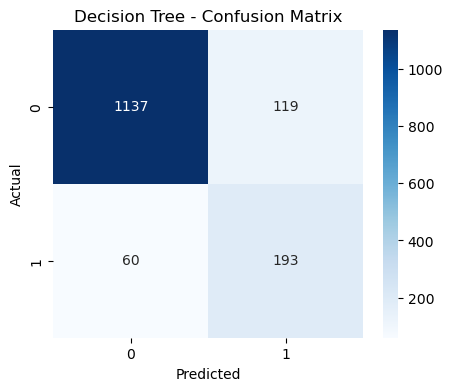

In [20]:
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))
])

dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# RANDOM FOREST

Random Forest Accuracy: 0.8316766070245195
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1256
           1       0.00      0.00      0.00       253

    accuracy                           0.83      1509
   macro avg       0.42      0.50      0.45      1509
weighted avg       0.69      0.83      0.76      1509



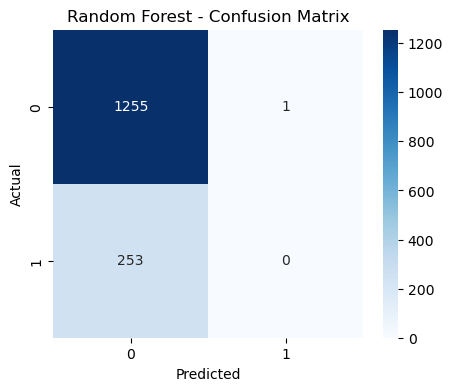

In [21]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# GRADIENT BOOSTING

Gradient Boosting Accuracy: 0.8800530152418821
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1256
           1       0.63      0.67      0.65       253

    accuracy                           0.88      1509
   macro avg       0.78      0.80      0.79      1509
weighted avg       0.88      0.88      0.88      1509



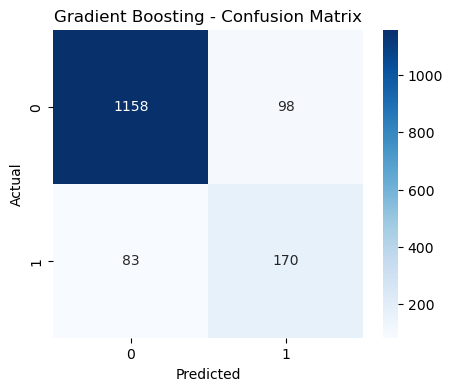

In [22]:
gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
print("DT Accuracy:", accuracy_score(y_test, dt_pred))
print("RF Accuracy:", accuracy_score(y_test, rf_pred))
print("GB Accuracy:", accuracy_score(y_test, gb_pred))

DT Accuracy: 0.8813783962889331
RF Accuracy: 0.8316766070245195
GB Accuracy: 0.8800530152418821


In [24]:
X_all = monthly[['branch','category','month','stock_qty','profit_margin','rating']]

monthly['rf_need_stock_up'] = rf_model.predict(X_all)
monthly['rf_probability'] = rf_model.predict_proba(X_all)[:, 1]

monthly[['branch','category','year','month','stock_qty','rf_need_stock_up','rf_probability']].head()

,branch,category,year,month,stock_qty,rf_need_stock_up,rf_probability
0,WALM001,Electronic accessories,2019,3,10.0,0,0.045908
1,WALM001,Electronic accessories,2019,5,3.0,0,0.055078
2,WALM001,Fashion accessories,2019,1,4.0,0,0.086433
3,WALM001,Fashion accessories,2019,3,2.0,0,0.091740
4,WALM001,Fashion accessories,2020,1,1.0,0,0.423680


In [25]:
new_data = pd.DataFrame({
    'branch': ['WALM067'],
    'category': ['Home and lifestyle'],
    'month': [3],
    'stock_qty': [5],         # current stock on shelf (LOW)
    'profit_margin': [0.15],  # past profit signal
    'rating': [8.8]           # past rating signal
})

pred = rf_model.predict(new_data)[0]
prob = rf_model.predict_proba(new_data)[:, 1][0]

print("Prediction (1=Stock up, 0=No):", pred)
print("Probability of Stock up:", prob)

Prediction (1=Stock up, 0=No): 0
Probability of Stock up: 0.17348223311856578


In [26]:
import pandas as pd

# Start the results table with actual values
results = X_test.copy()
results['Actual'] = y_test.values

# Decision Tree
results['DT_Pred'] = dt_model.predict(X_test)
results['DT_Prob'] = dt_model.predict_proba(X_test)[:, 1]

# Random Forest
results['RF_Pred'] = rf_model.predict(X_test)
results['RF_Prob'] = rf_model.predict_proba(X_test)[:, 1]

# Gradient Boosting
results['GB_Pred'] = gb_model.predict(X_test)
results['GB_Prob'] = gb_model.predict_proba(X_test)[:, 1]

# Show first 20 rows
results.head()


,branch,category,month,stock_qty,profit_margin,rating,Actual,DT_Pred,DT_Prob,RF_Pred,RF_Prob,GB_Pred,GB_Prob
3514,WALM059,Home and lifestyle,5,1.0,0.33,5.0,1,1,0.590814,0,0.395705,1,0.541702
916,WALM017,Fashion accessories,5,1.0,0.48,7.0,0,1,0.590814,0,0.413642,1,0.764177
243,WALM005,Fashion accessories,2,7.0,0.48,8.4,0,0,0.005332,0,0.083631,0,0.011462
1542,WALM028,Home and lifestyle,7,2.0,0.48,8.0,0,0,0.041359,0,0.079191,0,0.036329
5049,WALM084,Home and lifestyle,5,2.0,0.33,7.0,0,0,0.041359,0,0.092428,0,0.039565


In [27]:
results.tail()

,branch,category,month,stock_qty,profit_margin,rating,Actual,DT_Pred,DT_Prob,RF_Pred,RF_Prob,GB_Pred,GB_Prob
552,WALM010,Fashion accessories,12,3.0,0.48,8.0,0,0,0.005332,0,0.100173,0,0.011526
1868,WALM033,Fashion accessories,6,1.0,0.48,5.0,1,1,0.590814,0,0.407041,1,0.566816
53,WALM001,Sports and travel,3,4.5,0.36,6.8,0,0,0.005332,0,0.034185,0,0.005528
2145,WALM038,Fashion accessories,5,3.0,0.48,6.5,0,0,0.005332,0,0.077817,0,0.007134
124,WALM003,Fashion accessories,10,2.5,0.48,6.5,0,0,0.005332,0,0.080364,0,0.010992


# CONCLUSION:

Decision Tree = predicts almost exactly like actual values

Gradient Boosting = also predicts almost exactly

Random Forest = makes more wrong predictions

Why my Random Forest was not working 

Random Forest,averages many different trees and becomes more cautious

It trains many trees,each tree: Sees only part of the data and Sees only part of the features

Final answer = majority vote, so it gives wrong predictions because it is learning from different trees

Final Conclusion:

Decision Tree and Gradient Boosting closely match the rule-based target generation logic, resulting in higher accuracy, while Random Forest produces more conservative predictions by averaging multiple trees, leading to fewer but more cautious stock-up recommendations.

In [28]:
# To improve the accuracy of random forest model , i am doing hyperparameter tuning
# reason: the trees are most sensitive to depth of trees, number of tree and samples


rf_new_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=400, #adding more  trees
        max_depth=15,# this maximum depth increases deeper learning
        min_samples_split=5, # tries to avoid noisy in the data
        min_samples_leaf=3, # to make smoother decisions
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    ))
])

rf_new_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['branch', 'category',
                                                   'month']),
                                                 ('num', StandardScaler(),
                                                  ['stock_qty', 'profit_margin',
                                                   'rating'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=3,
                                        min_samples_split=5, n_estimators=400,
                                        n_jobs=-1, random_state=42))])

Tuned Random Forest Accuracy: 0.8363154406891982

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1256
           1       0.69      0.04      0.08       253

    accuracy                           0.84      1509
   macro avg       0.76      0.52      0.50      1509
weighted avg       0.81      0.84      0.77      1509



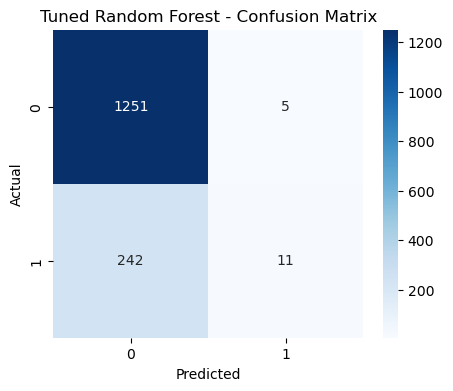

In [29]:
# to train my new random forest model with the train data
rf_new_model.fit(X_train, y_train)

# to predict the predictions with test data
rf_new_pred = rf_new_model.predict(X_test)

# to get evaluation of my old model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, rf_new_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_new_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, rf_new_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Tuned Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
print("Old RF Accuracy:", accuracy_score(y_test, rf_pred))
print("New RF Accuracy:", accuracy_score(y_test, rf_new_pred))


Old RF Accuracy: 0.8316766070245195
New RF Accuracy: 0.8363154406891982


In [31]:
results = X_test.copy()
results["Actual"] = y_test.values
results["RF_Old_Pred"] = rf_model.predict(X_test)
results["RF_New_Pred"] = rf_new_model.predict(X_test)

results.head(20)

,branch,category,month,stock_qty,profit_margin,rating,Actual,RF_Old_Pred,RF_New_Pred
3514,WALM059,Home and lifestyle,5,1.000000,0.33,5.000000,1,0,0
916,WALM017,Fashion accessories,5,1.000000,0.48,7.000000,0,0,0
243,WALM005,Fashion accessories,2,7.000000,0.48,8.400000,0,0,0
1542,WALM028,Home and lifestyle,7,2.000000,0.48,8.000000,0,0,0
5049,WALM084,Home and lifestyle,5,2.000000,0.33,7.000000,0,0,0
3817,WALM065,Fashion accessories,11,1.666667,0.33,6.000000,0,0,0
2708,WALM047,Home and lifestyle,12,2.000000,0.48,6.000000,0,0,0
1971,WALM035,Fashion accessories,1,2.333333,0.48,4.333333,0,0,0
1459,WALM027,Fashion accessories,11,2.500000,0.48,9.000000,0,0,0
3559,WALM060,Home and lifestyle,12,1.500000,0.33,6.000000,0,0,0


# CONCLUSION AFTER HYPERPARAMETER TUNING

Actually, after hyperparameter tuning also , by building new Random Forest Model also it is not giving the correct prediction values . so the Random Forest is not fit for my reccomdation model ,because of best voting based it gives wrong predictions